# **CAPSTONE PROJECT-NETFLIX**

 # Table of Contents
1. Problem Statement
2. Project Objective
3. Data Description
4. Data Preprocessing Steps and inspiration
5. Analysis and Insights
6. Choosing the Algorithm
7. Model Evaluation and Techniques
8. Recommendations
9. .Conclusion


 # Problem Statement
Customer Behaviour and it’s prediction lies
at the core of every Business Model. From
Stock Exchange, e-Commerce and
Automobile to even Presidential Elections,
predictions serve a great purpose. Most of
these predictions are based on the data
available about a person’s activity either
online or in-person.
    Recommendation Engines are the much
needed manifestations of the desired
Predictability of User Activity.
Recommendation Engines move one step
further and not only give information but
put forth strategies to further increase users
interaction with the platform

In today’s world OTT platform and Streaming
Services have taken up a big chunk in the
Retail and Entertainment industry.
Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest
products that better suit the user needs and
choices.
    For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground-up, where every single user,
based on there area of interest and ratings,
would be recommended a list of movies that
are best suited for them.

## Project Objective

1. Find out the list of most popular and liked genre
2. Create Model that finds the best suited Movie for one
user in every genre.
3. Find what Genre Movies have received the best and
worst ratings based on User Rating.

## Data Description
1. ID – Contains the separate keys for
customer and movies.
2. Rating – A section contains the user
ratings for all the movies.
3. Genre – Highlights the category of the
movie.
4. Movie Name – Name of the movie with
respect to the movie id.

In [15]:
### Importing Librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Steps and inspiration

# 1. DATA CLEANING

In [2]:
df=pd.read_csv("/content/combined_data_1.txt",header=None,names=["Customer_ID","Ratings"],usecols=[0,1])

In [3]:
df.head()

,Customer_ID,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
df.isna().sum()

,0
Customer_ID,0
Ratings,4499


In [5]:
df.describe()

,Ratings
count,2.405376e+07
mean,3.599634e+00
std,1.086118e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [6]:
current_ids=None
Movie_ids=[]
for cust_id in df["Customer_ID"]:
  if ":" in cust_id:
    current_ids=int(cust_id.replace(":"," "))
  Movie_ids.append(current_ids)

df["Movie_id"]=Movie_ids
df=df[df["Ratings"].notna()]

In [7]:
df.head()

,Customer_ID,Ratings,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [8]:
Movie_count=df["Movie_id"].nunique()
Movie_count

4499

In [9]:
Customer_count=df["Customer_ID"].nunique()
Customer_count


470758

In [10]:
Rating=df["Ratings"].value_counts()
Rating

,count
Ratings,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


# 2.  EDA

In [11]:
f=["count","mean"]

### Benchmarking Movies based on Movie Ratings

In [12]:
Movie_list= df.groupby("Movie_id")["Ratings"].agg(f)
Movie_list

,count,mean
Movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [13]:
Movie_Benchmark=round(Movie_list["count"].quantile(0.60))
Movie_Benchmark

908

In [14]:
Drop_list_Movie=Movie_list[Movie_list['count']<Movie_Benchmark].index
Drop_list_Movie

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_id', length=2699)

## Insights

Here i have taken an benchmark of 60% in number of movie. And all movies which was below the benchmark has been removed from the dataset. This has been done for the identifying the genuiue movies.

### Benchmarking Customers based on Movie Ratings

In [15]:
Customer_list=df.groupby("Customer_ID")['Ratings'].agg(f)
Customer_list

,count,mean
Customer_ID,,
10,49,3.346939
1000004,1,5.000000
1000027,30,4.300000
1000033,101,3.316832
1000035,20,4.400000
...,...,...
999964,48,4.062500
999972,35,4.057143
999977,14,3.714286


In [16]:
Customer_benchmark=round(Customer_list['count'].quantile(0.6))
Customer_benchmark

36

In [17]:
Drop_list_customer=Customer_list[Customer_list['count']<Customer_benchmark].index
Drop_list_customer

Index(['1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072', '1000076',
       ...
       '999919', '999921', '999932', '999935', '99994', '999945', '999949',
       '999972', '999977', '999988'],
      dtype='object', name='Customer_ID', length=282042)

## Insights

Here i have taken an benchmark of 60% for the customer count. And all customers who have been watched below the Benchmark of 36 movies has been removed from dataset. This has been done for the identifying the genuiue customers.

In [18]:
df=df[~df["Movie_id"].isin(Drop_list_Movie)]
df=df[~df["Customer_ID"].isin(Drop_list_customer)]
df.head()

,Customer_ID,Ratings,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


# Loading Movie_Titles

In [19]:
Movie_Title=pd.read_csv("/content/movie_titles.csv",encoding='ISO-8859-1',header=None,names=["Movie_ids","Year","Title"],usecols=[0,1,2])
Movie_Title.head()

,Movie_ids,Year,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


# Analysis and Insights

 # 1.Find out the list of most popular and liked Movie

In [20]:
Movie_Title.index=Movie_Title["Movie_ids"]
Movie_Title.head(2)

,Movie_ids,Year,Title
Movie_ids,,,
1,1,2003.0,Dinosaur Planet
2,2,2004.0,Isle of Man TT 2004 Review


Text(0.5, 1.0, 'Most Popular and liked Movies')

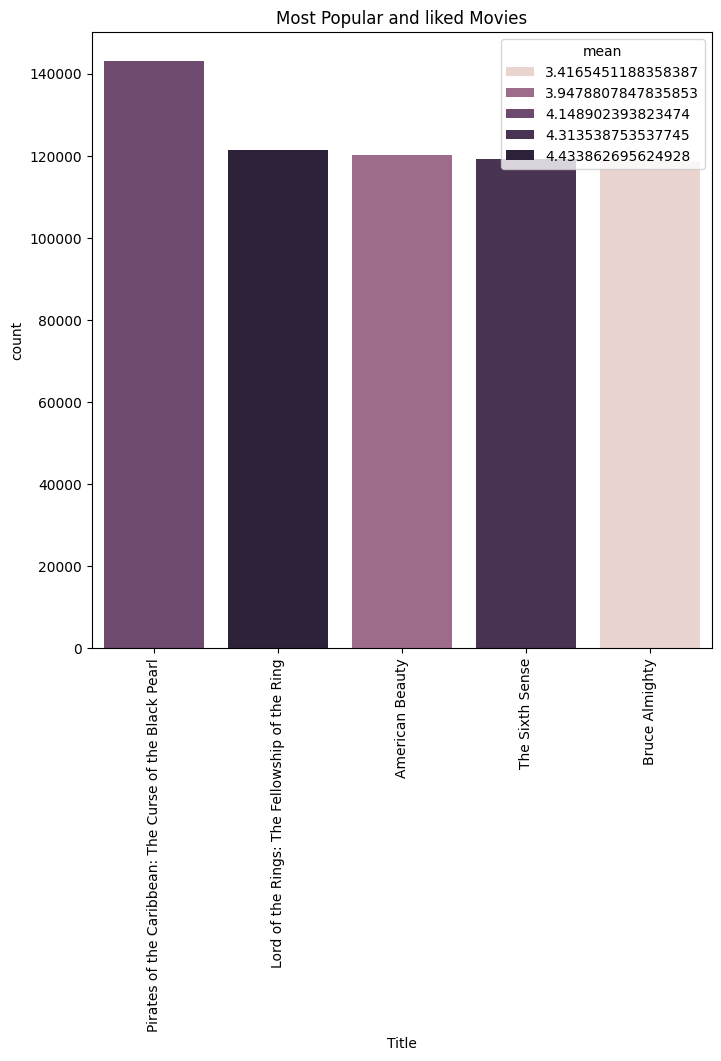

In [21]:
Most_popular_Genre=df.groupby("Movie_id")["Ratings"].agg(f)
Most_popular_Genre=Most_popular_Genre.sort_values(by=["count","mean"],ascending=False).head(5)
Most_popular_Genre["Title"]=Movie_Title["Title"]
plt.figure(figsize=(8,8))
sns.barplot(Most_popular_Genre.head(),x="Title",y="count",hue="mean")
plt.xticks(rotation=90)
plt.title("Most Popular and liked Movies")

# Analysis and Insights

For understanding the Most popular and liked movie . I have grouped the movie ids and Rating by its count and mean. From Above chart it shows the Pirates of caribbean is the most popular movie based on the number of customers watched with an average rating of 3.41.

# 2.Create Model that finds the best suited Movie for one user in every genre.

In [22]:
!pip install scikit-surprise

Importing Libraries

In [23]:
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [24]:
reader=Reader()

In [25]:
Data=Dataset.load_from_df(df[["Customer_ID","Movie_id","Ratings"]][:10000],reader)

 # Intializing Model

In [26]:
svd=SVD()
cross_validate(svd,Data,measures=["RMSE","MAE"],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2404  1.2600  1.2840  1.2247  1.2494  1.2517  0.0199  
MAE (testset)     1.0106  1.0288  1.0511  0.9880  1.0314  1.0220  0.0213  
Fit time          0.50    0.40    0.30    0.27    0.28    0.35    0.09    
Test time         0.02    0.02    0.01    0.01    0.02    0.02    0.00    


{'test_rmse': array([1.24040471, 1.25999695, 1.28402255, 1.22466856, 1.24936746]),
 'test_mae': array([1.01064231, 1.02879461, 1.05114027, 0.98803987, 1.03139614]),
 'fit_time': (0.49808359146118164,
  0.3973965644836426,
  0.2989835739135742,
  0.265303373336792,
  0.2776651382446289),
 'test_time': (0.016790390014648438,
  0.019065141677856445,
  0.014513731002807617,
  0.014333724975585938,
  0.0178220272064209)}

In [27]:
df.head()

,Customer_ID,Ratings,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [28]:
user_id_822109=Movie_Title.copy()

In [29]:
def predict_score(movie_ids):
  return svd.predict(822109,movie_ids).est

In [30]:
user_id_822109=user_id_822109[user_id_822109["Movie_ids"].isin(Drop_list_Movie)]
user_id_822109

,Movie_ids,Year,Title
Movie_ids,,,
1,1,2003.0,Dinosaur Planet
2,2,2004.0,Isle of Man TT 2004 Review
4,4,1994.0,Paula Abdul's Get Up & Dance
7,7,1992.0,8 Man
9,9,1991.0,Class of Nuke 'Em High 2
...,...,...,...
4494,4494,1997.0,Cartoon Crazys: Vol. 1
4495,4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4497,4497,1990.0,Texasville


 # Evaluting Model

In [31]:
user_id_822109["Estimated_Score"]=user_id_822109["Movie_ids"].apply(predict_score)
user_id_822109=user_id_822109.drop("Movie_ids",axis=1)

<ipython-input-31-0950a9bf2981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_id_822109["Estimated_Score"]=user_id_822109["Movie_ids"].apply(predict_score)


In [32]:
user_id_822109

,Year,Title,Estimated_Score
Movie_ids,,,
1,2003.0,Dinosaur Planet,3.280875
2,2004.0,Isle of Man TT 2004 Review,3.280875
4,1994.0,Paula Abdul's Get Up & Dance,3.280875
7,1992.0,8 Man,3.280875
9,1991.0,Class of Nuke 'Em High 2,3.280875
...,...,...,...
4494,1997.0,Cartoon Crazys: Vol. 1,3.280875
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love,3.280875
4497,1990.0,Texasville,3.280875


 # Choosing the Algorithm

Singular Value Decomposition (SVD) is a powerful mathematical technique used in various fields, including recommendation systems. It decomposes a matrix into three other matrices, capturing essential patterns in the data. SVD helps in breaking down a complex user-item interaction matrix into simpler matrices that reveal hidden patterns. This decomposition aids in making accurate predictions and providing personalized recommendations, making it a crucial technique in the realm of recommendation systems.

 

 # 3. Find Which Movies have received the best and worst ratings based on User Rating.

 # Best Movie

In [33]:
Best_movie=df.groupby("Movie_id")["Ratings"].agg(f)
Best_movie=Best_movie.sort_values(by="mean",ascending=False).head(5)
Best_movie["Title"]=Movie_Title["Title"]
Best_movie

,count,mean,Title
Movie_id,,,
3456,5533,4.667269,Lost: Season 1
2102,7777,4.588016,The Simpsons: Season 6
3444,8763,4.520370,Family Guy: Freakin' Sweet Collection
4238,1264,4.495253,Inu-Yasha
1476,9588,4.466834,Six Feet Under: Season 4


# Insights:
 For the understanding the best rated movies , i have grouped the movie_id and ratings with count and mean. By sorting based of the ratings the Movie_Title Lost:Season has received highest average rating of 4.66 from 5533 customers.But the number of customer watched is less compared to Pirates.

# Worst _movie

In [34]:
Worst_movie=df.groupby("Movie_id")["Ratings"].agg(f)
Worst_movie=Worst_movie.sort_values(by="mean",ascending=True).head(5)
Worst_movie["Title"]=Movie_Title["Title"]
Worst_movie

,count,mean,Title
Movie_id,,,
3667,1168,1.755993,Shanghai Surprise
3021,4947,1.962401,House of the Dead
4394,1185,2.012658,Druids
2276,1917,2.122587,Spice World
4255,3381,2.192842,Gerry



 # Insights:
 
For the understanding the Worst rated movies , i have grouped the movie_id and ratings with count and mean. By sorting based of the ratings the Movie_Title Shanghai Surprise has received lowest average rating of 1.755 from 1168 customers.But the number of customer watched is less compared to Pirates.

 # Recommendations

Based on the analysis and insights derived from the dataset, the following recommendations are proposed:
1. We can use the SVD mehod for identifying each users liked genre movies and can recommend the same.
 
 2. For the Recommendation Engine like netflix we can use the SVD method.
    
 3. With the help of histrocial behaviour of customers we can suggest the movie based on there estimation score.


  # Conclusion

This project aimed to recommend the movies to customer based on their ratings and number of movies they have watched. Netflix can use SVD mehod to recommend and predict each users liked movies. By leveraging historical behaviour of customer, netflix can use svd predict to identify likes of the customer and can suggest them.